In [1]:
import pandas as pd
import seaborn as sns

# About the dataset
* The dataset contains data regarding the rent of apartments/houses in some cities in India
* We will explore the dataset in the following sections
* Source: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv

# Read the dataset

In [2]:
df = pd.read_csv('../data/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Explore the dataset

In [3]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


* Floor here is considered as an object, since it shows both the floor of the rental area and the total number of floors in the building
* It will be easy to analyze if we separate the two properties

In [5]:
# The "Rent_Floor" column shows the floor of the rental area
# The "Total_Floors" column shows the total number of floors in the building
df[['Rent_Floor', 'Total_Floors']] = df.Floor.str.split("out of", expand=True)
df.drop(labels=['Floor'], axis=1, inplace=True)
rent_floor = df['Rent_Floor']
total_floors = df['Total_Floors']
df.drop(labels=['Rent_Floor'], axis=1, inplace=True)
df.drop(labels=['Total_Floors'], axis=1, inplace=True)
df.insert(3, 'Rent_Floor', rent_floor)
df.insert(4, 'Total_Floors', total_floors)
# Let us replace the "Ground" floor with "0" for better analysis
df['Rent_Floor'] = df['Rent_Floor'].str.replace('Ground', '0')
df.head()

,Posted On,BHK,Rent,Rent_Floor,Total_Floors,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,0,2,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,1,3,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1,3,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,1,2,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,1,2,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
# Move the Rent column to the end of the dataset
rent = df['Rent']
df.drop(labels=['Rent'], axis=1, inplace=True)
df.insert(len(df.columns), 'Rent', rent)
df.head()
# This allows us to clearly visualize the dataset for when we train our model for price prediction

,Posted On,BHK,Rent_Floor,Total_Floors,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,2022-05-18,2,0,2,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000
1,2022-05-13,2,1,3,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000
2,2022-05-16,2,1,3,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000
3,2022-07-04,2,1,2,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000
4,2022-05-09,2,1,2,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent_Floor         4746 non-null   object
 3   Total_Floors       4742 non-null   object
 4   Size               4746 non-null   int64 
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
 12  Rent               4746 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 482.1+ KB


In [8]:
# Let us change the data type of the "Posted On" column to datetime
df['Posted On'] = pd.to_datetime(df['Posted On'])

In [9]:
# Convert the "Rent_Floor" and "Total_Floors" columns to integer
# df['Rent_Floor'] = df['Rent_Floor'].astype(int)
# df['Total_Floors'] = df['Total_Floors'].astype(int)

* Running the above code block, we see that there has been some error due to an entry that states "Upper Basement" as the floor of the rental area
* Also, the total floor column contains some null values
* We will fix this issue now

In [10]:
# Show the total entries with string values
df[df['Rent_Floor'].str.contains('[a-zA-Z]')]

,Posted On,BHK,Rent_Floor,Total_Floors,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
290,2022-06-29,1,Upper Basement,4,200,Super Area,Baguihati,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3500
518,2022-06-08,2,Lower Basement,2,1320,Super Area,Ballygunge,Kolkata,Furnished,Bachelors/Family,2,Contact Owner,45000
549,2022-06-02,2,Upper Basement,9,650,Carpet Area,"Nakoda Heights, Nalasopara",Mumbai,Semi-Furnished,Family,2,Contact Agent,8000
559,2022-05-22,1,Upper Basement,16,488,Carpet Area,"Kyraa Ariso Apartment, Chembur",Mumbai,Semi-Furnished,Bachelors/Family,2,Contact Owner,30000
631,2022-06-04,4,Upper Basement,20,2600,Carpet Area,Lokhandwala Complex,Mumbai,Unfurnished,Family,4,Contact Agent,310000
633,2022-07-06,3,Upper Basement,9,950,Carpet Area,Tilak Nagar - Harbour Line,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent,65000
635,2022-05-18,3,Upper Basement,40,1330,Carpet Area,Lodha Ajuro tower lalbag,Mumbai,Unfurnished,Bachelors/Family,3,Contact Agent,150000
694,2022-07-09,3,Upper Basement,10,900,Carpet Area,Chikuwadi,Mumbai,Semi-Furnished,Family,2,Contact Agent,55000
722,2022-06-04,2,Upper Basement,30,750,Carpet Area,"Lodha NCP Commercial , Wadala",Mumbai,Unfurnished,Bachelors/Family,2,Contact Agent,100000
952,2022-06-24,3,Upper Basement,30,2000,Carpet Area,"Flora Heights, Andheri West",Mumbai,Furnished,Family,3,Contact Agent,160000


* So there are "Upper basement" and "Lower Basement" as the string value
* We will replace it with "-1"  and "-2" respectively for better analysis

In [11]:
df['Rent_Floor'] = df['Rent_Floor'].str.replace('Upper Basement', '-1')
df['Rent_Floor'] = df['Rent_Floor'].str.replace('Lower Basement', '-2')

In [12]:
# Show null values in the dataset
df.isnull().sum()

Posted On            0
BHK                  0
Rent_Floor           0
Total_Floors         4
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Rent                 0
dtype: int64

* As seen from the error above, there are indeed null values in the dataset. We will deal with them now

In [13]:
# Show the rows that have null data
df[df.isnull().any(axis=1)]

,Posted On,BHK,Rent_Floor,Total_Floors,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
2553,2022-06-18,2,3,None,400,Super Area,"Kasturba Niketan, Lajpat Nagar 2",Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,20000
2883,2022-05-23,1,0,None,450,Carpet Area,"DDA Flat AD Block, Shalimar Bagh AD Block",Delhi,Furnished,Bachelors/Family,1,Contact Owner,18000
4490,2022-06-12,3,1,None,900,Super Area,"Malakpet, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,15000
4560,2022-05-31,3,1,None,1270,Carpet Area,Tarnaka,Hyderabad,Furnished,Family,2,Contact Owner,15000


* If the rent floor were 0, then it would seem like that total floors would also be 0, i.e., the building is single story
* But this is not the case. So to remove confusion, we will nuke those rows

In [14]:
df.dropna(inplace=True)

In [15]:
# Convert the Rent floor and total floor column in to integer datatype
df['Rent_Floor'] = df['Rent_Floor'].astype(int)
df['Total_Floors'] = df['Total_Floors'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4742 non-null   datetime64[ns]
 1   BHK                4742 non-null   int64         
 2   Rent_Floor         4742 non-null   int64         
 3   Total_Floors       4742 non-null   int64         
 4   Size               4742 non-null   int64         
 5   Area Type          4742 non-null   object        
 6   Area Locality      4742 non-null   object        
 7   City               4742 non-null   object        
 8   Furnishing Status  4742 non-null   object        
 9   Tenant Preferred   4742 non-null   object        
 10  Bathroom           4742 non-null   int64         
 11  Point of Contact   4742 non-null   object        
 12  Rent               4742 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 518.7+ 

In [17]:
df.head()

,Posted On,BHK,Rent_Floor,Total_Floors,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,2022-05-18,2,0,2,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,10000
1,2022-05-13,2,1,3,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,20000
2,2022-05-16,2,1,3,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17000
3,2022-07-04,2,1,2,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10000
4,2022-05-09,2,1,2,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,7500


* Now the dataset is ready for analysis

In [18]:
# Save the df as csv in the data folder for training the model at a later stage
df.to_csv('../data/House_Rent_Dataset_Clean.csv', index=False)

# Analysis

array([[<Axes: title={'center': 'Posted On'}>,
        <Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Rent_Floor'}>],
       [<Axes: title={'center': 'Total_Floors'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Rent'}>, <Axes: >, <Axes: >]],
      dtype=object)

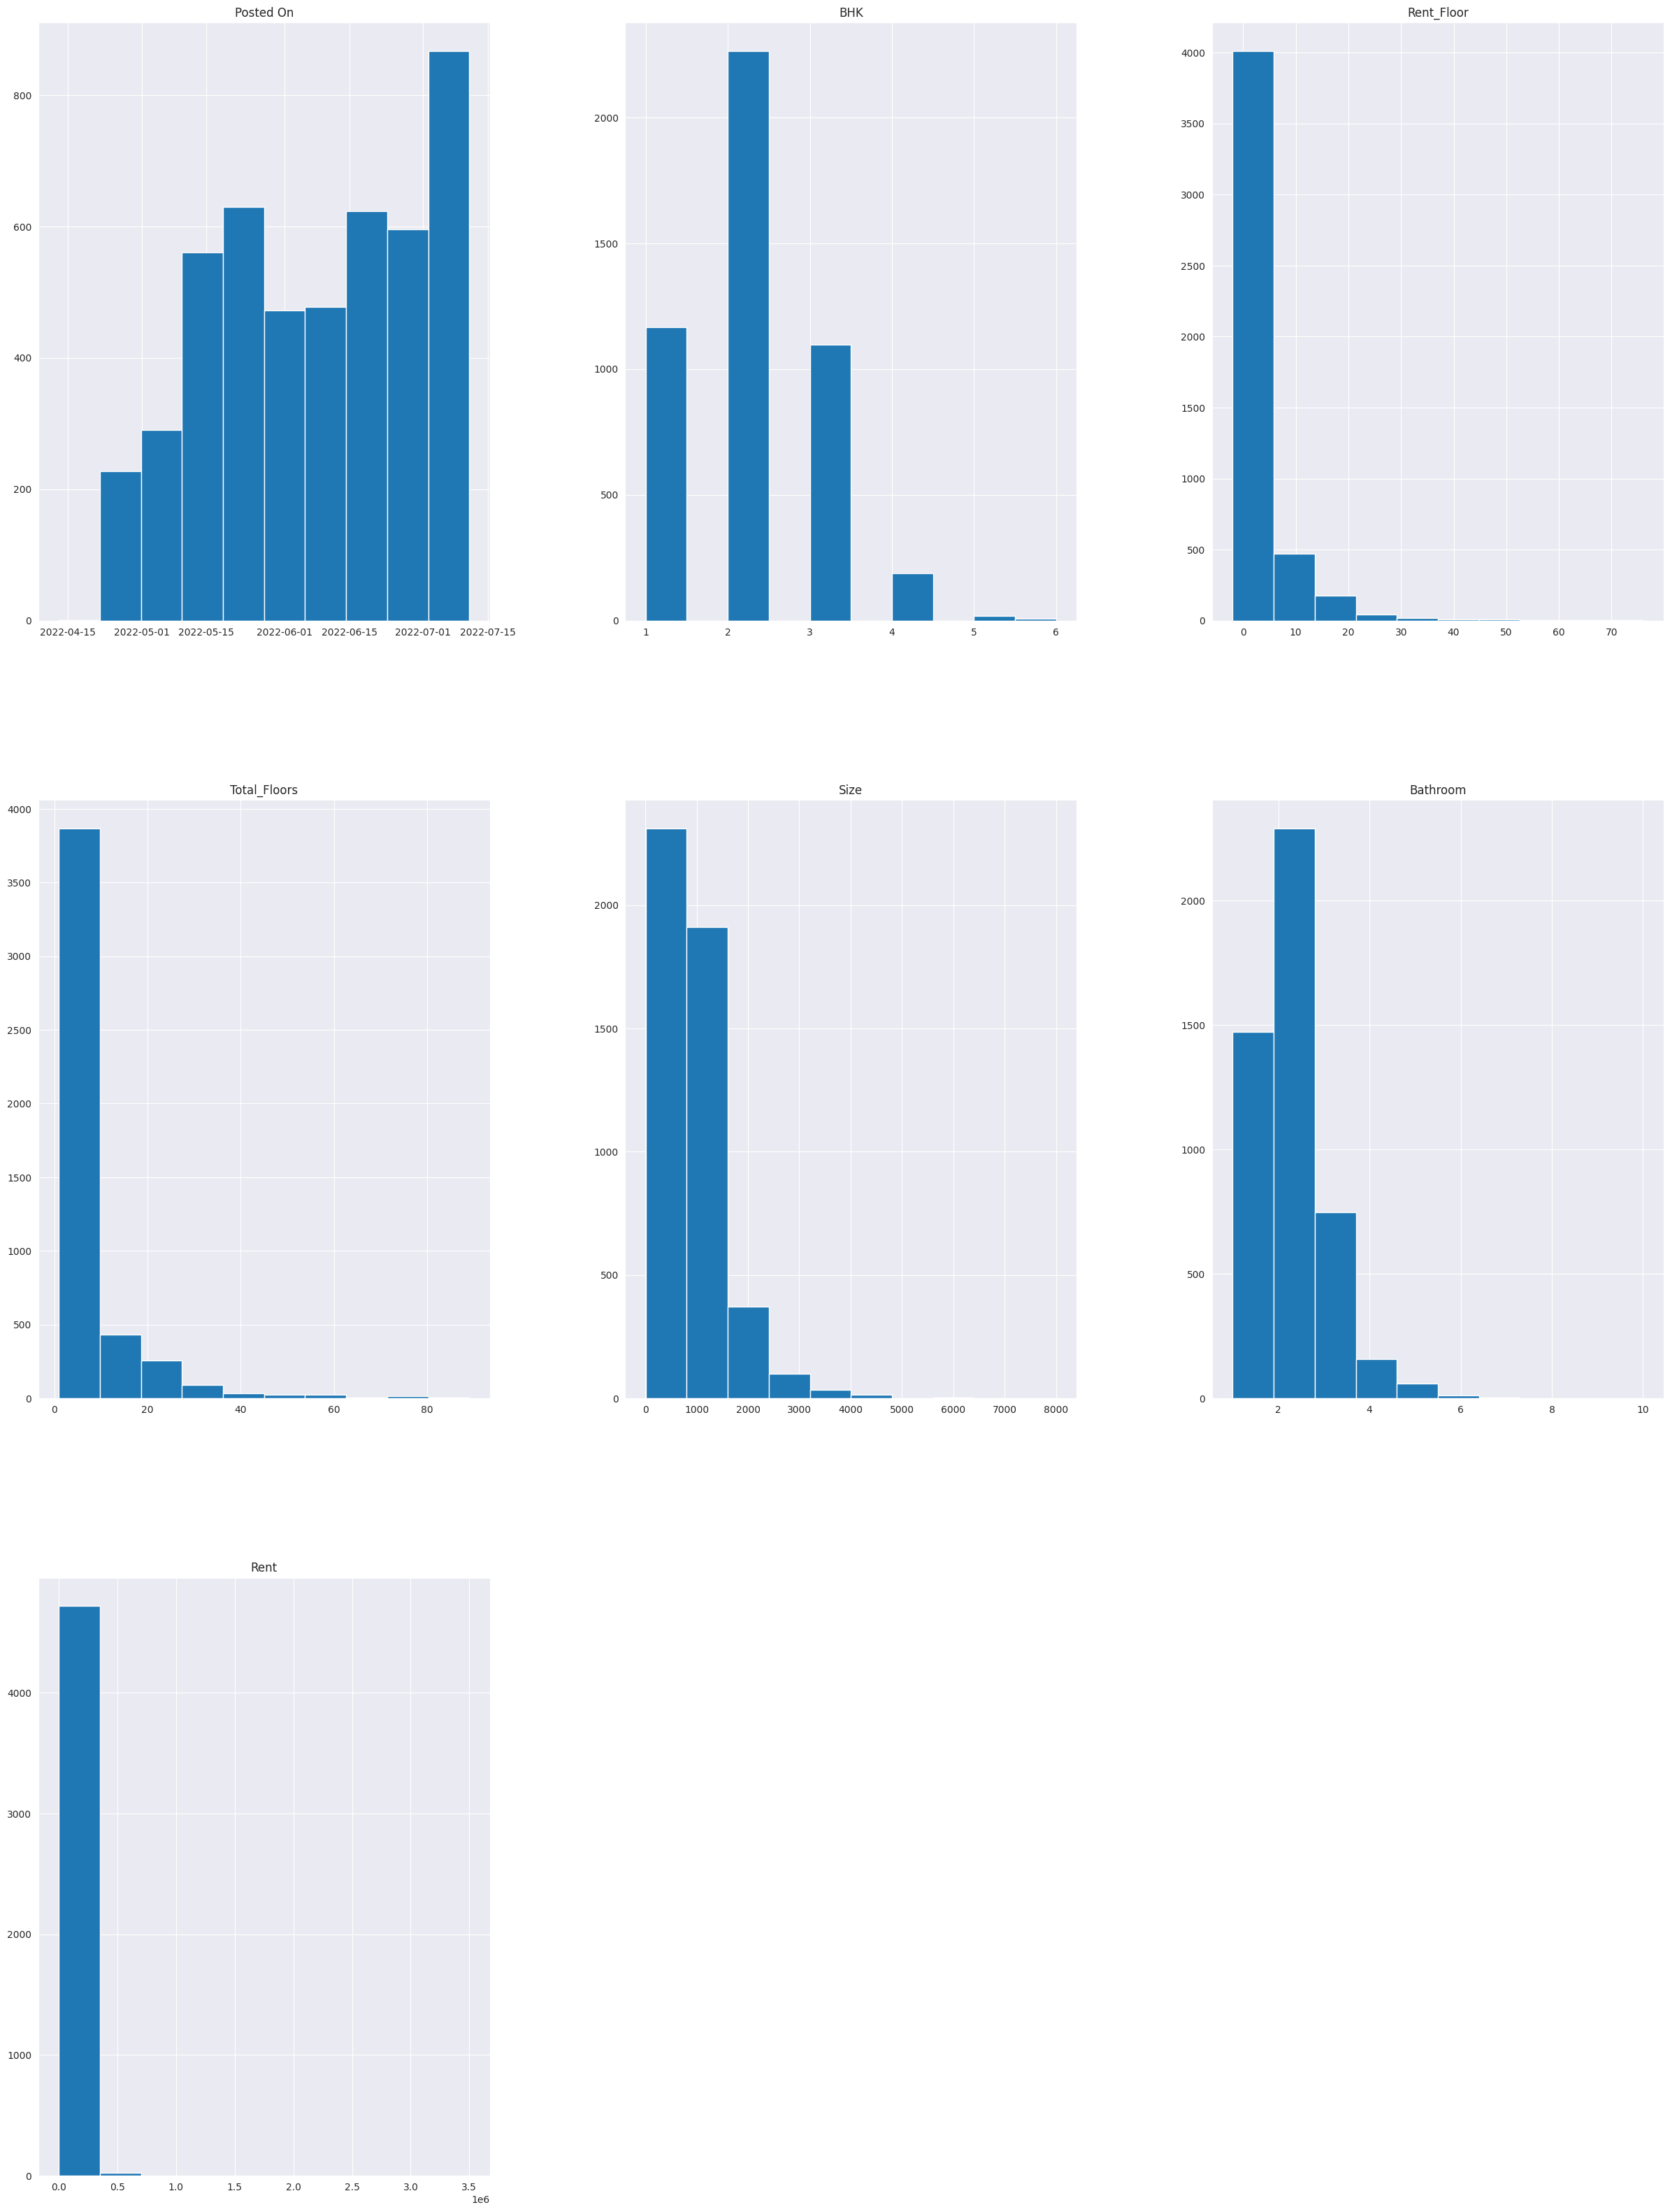

In [19]:
df.hist(figsize=(30, 40))

In [20]:
# The rent column is skewed to the right
# Let us see the mean rent
df['Rent'].mean()

35008.629270350066

<Axes: xlabel='Furnishing Status', ylabel='Rent'>

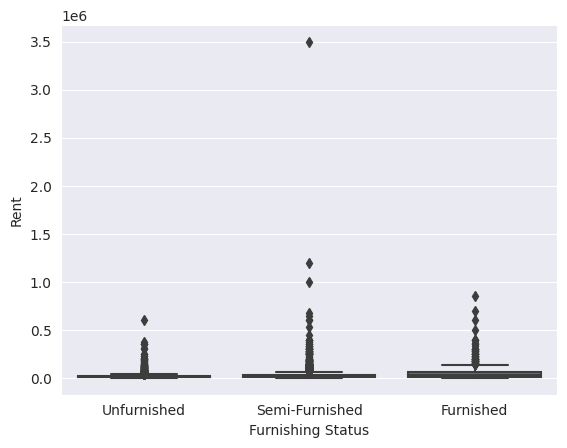

In [21]:
sns.boxplot(x="Furnishing Status", y="Rent", data = df)

<Axes: xlabel='Furnishing Status', ylabel='Rent'>

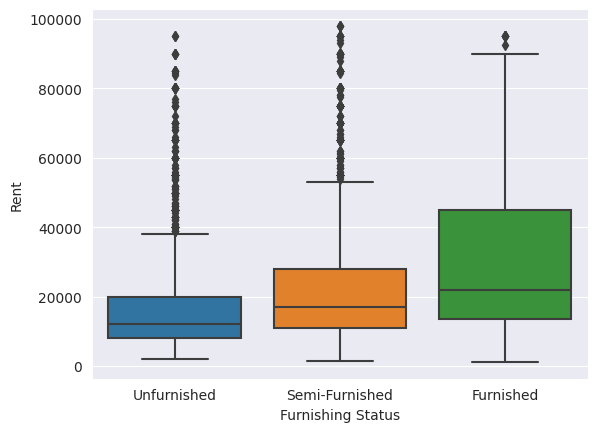

In [22]:
# Remove the outlier in the Semi furnished category
df = df[df['Rent'] < 100000]
sns.boxplot(x="Furnishing Status", y="Rent", data = df)

<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

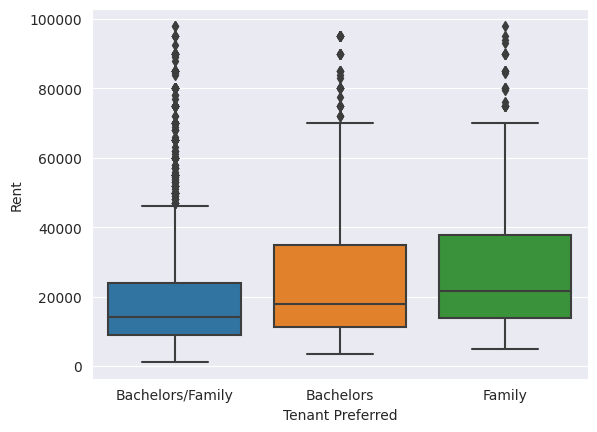

In [23]:
sns.boxplot(x="Tenant Preferred", y="Rent", data = df)

<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

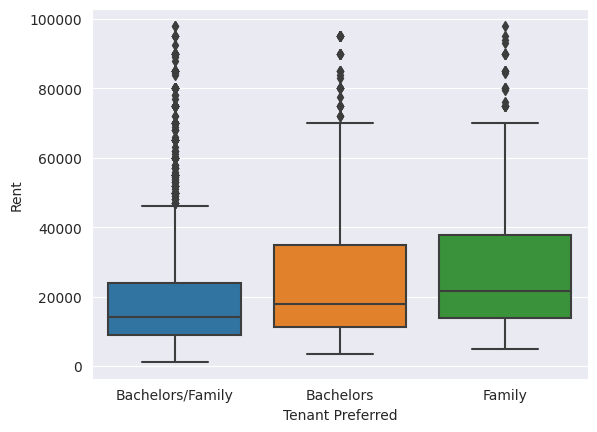

In [24]:
df = df[df['Rent'] < 100000]
sns.boxplot(x="Tenant Preferred", y="Rent", data = df)

<Axes: xlabel='City', ylabel='Rent'>

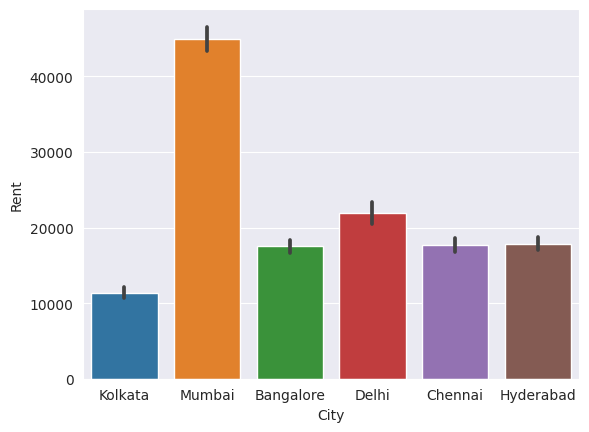

In [25]:
sns.barplot(x="City", y="Rent", data = df)

In [26]:
df.groupby('City')['Rent'].mean().sort_values(ascending=False)

City
Mumbai       44969.328398
Delhi        21941.739130
Hyderabad    17851.682726
Chennai      17684.874568
Bangalore    17494.431555
Kolkata      11323.271511
Name: Rent, dtype: float64

<Axes: xlabel='City', ylabel='BHK'>

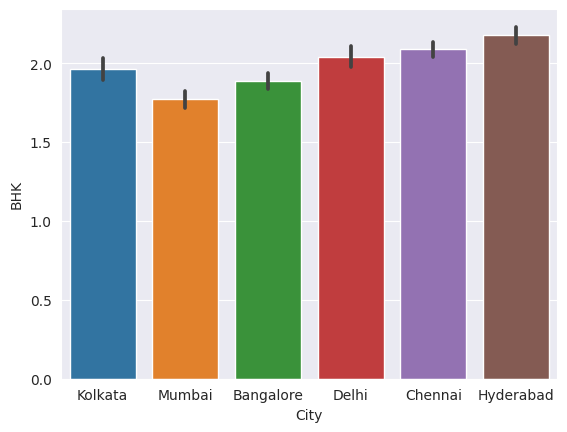

In [27]:
sns.barplot(x="City", y="BHK", data = df)

<Axes: xlabel='City', ylabel='Size'>

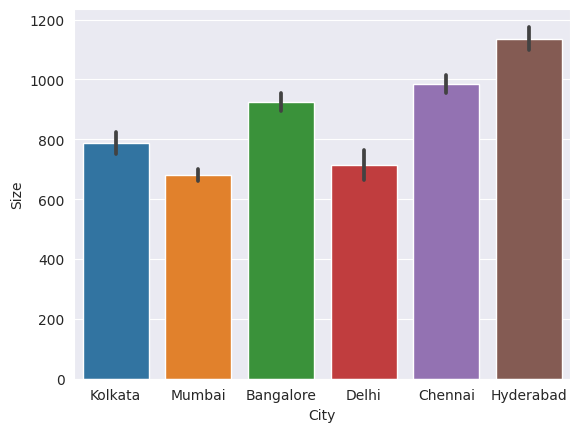

In [28]:
sns.barplot(x="City", y="Size", data = df)

<Axes: xlabel='BHK', ylabel='Rent'>

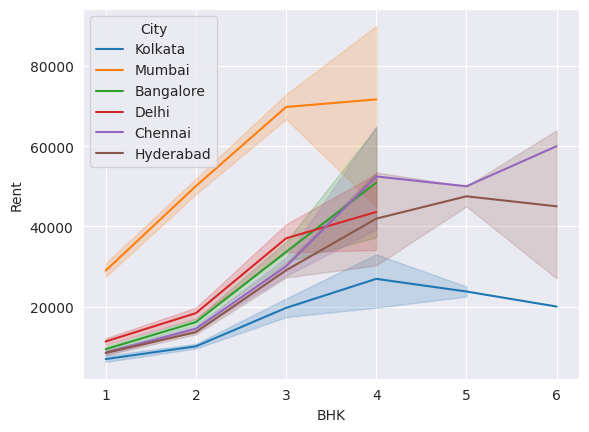

In [29]:
sns.lineplot(x="BHK", y="Rent", hue="City", data = df)

<Axes: xlabel='Rent_Floor', ylabel='Rent'>

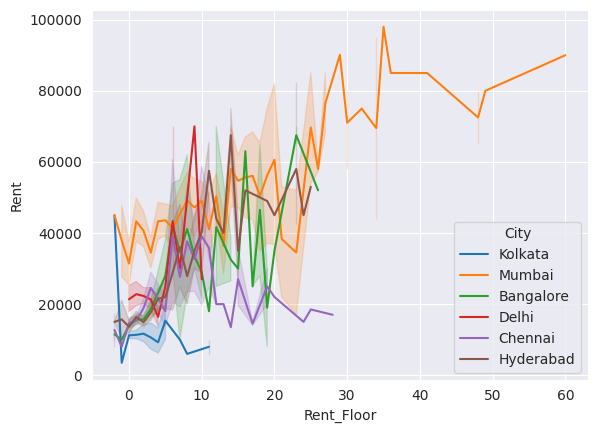

In [30]:
sns.lineplot(x="Rent_Floor", y="Rent", hue="City", data = df)

<Axes: xlabel='Total_Floors', ylabel='Rent'>

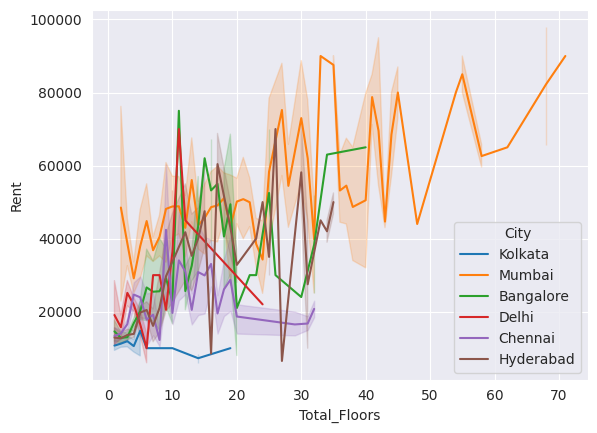

In [31]:
sns.lineplot(x="Total_Floors", y="Rent", hue="City", data = df)

<Axes: xlabel='Bathroom', ylabel='Rent'>

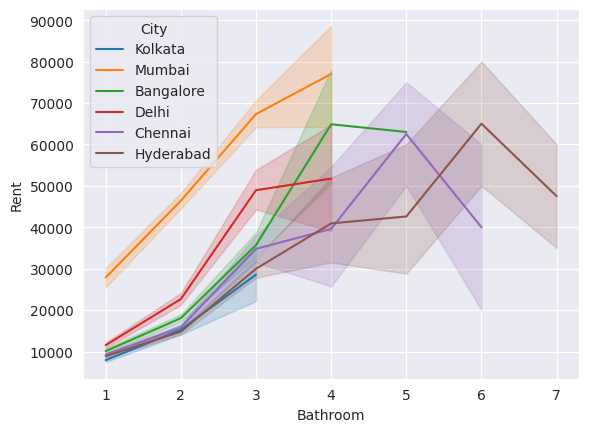

In [32]:
sns.lineplot(x="Bathroom", y="Rent", hue="City", data = df)

<Axes: xlabel='Size', ylabel='Rent'>

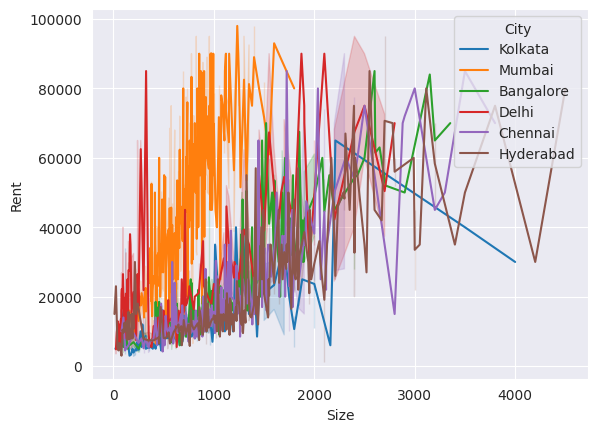

In [33]:
sns.lineplot(x="Size", y="Rent", hue="City", data = df)

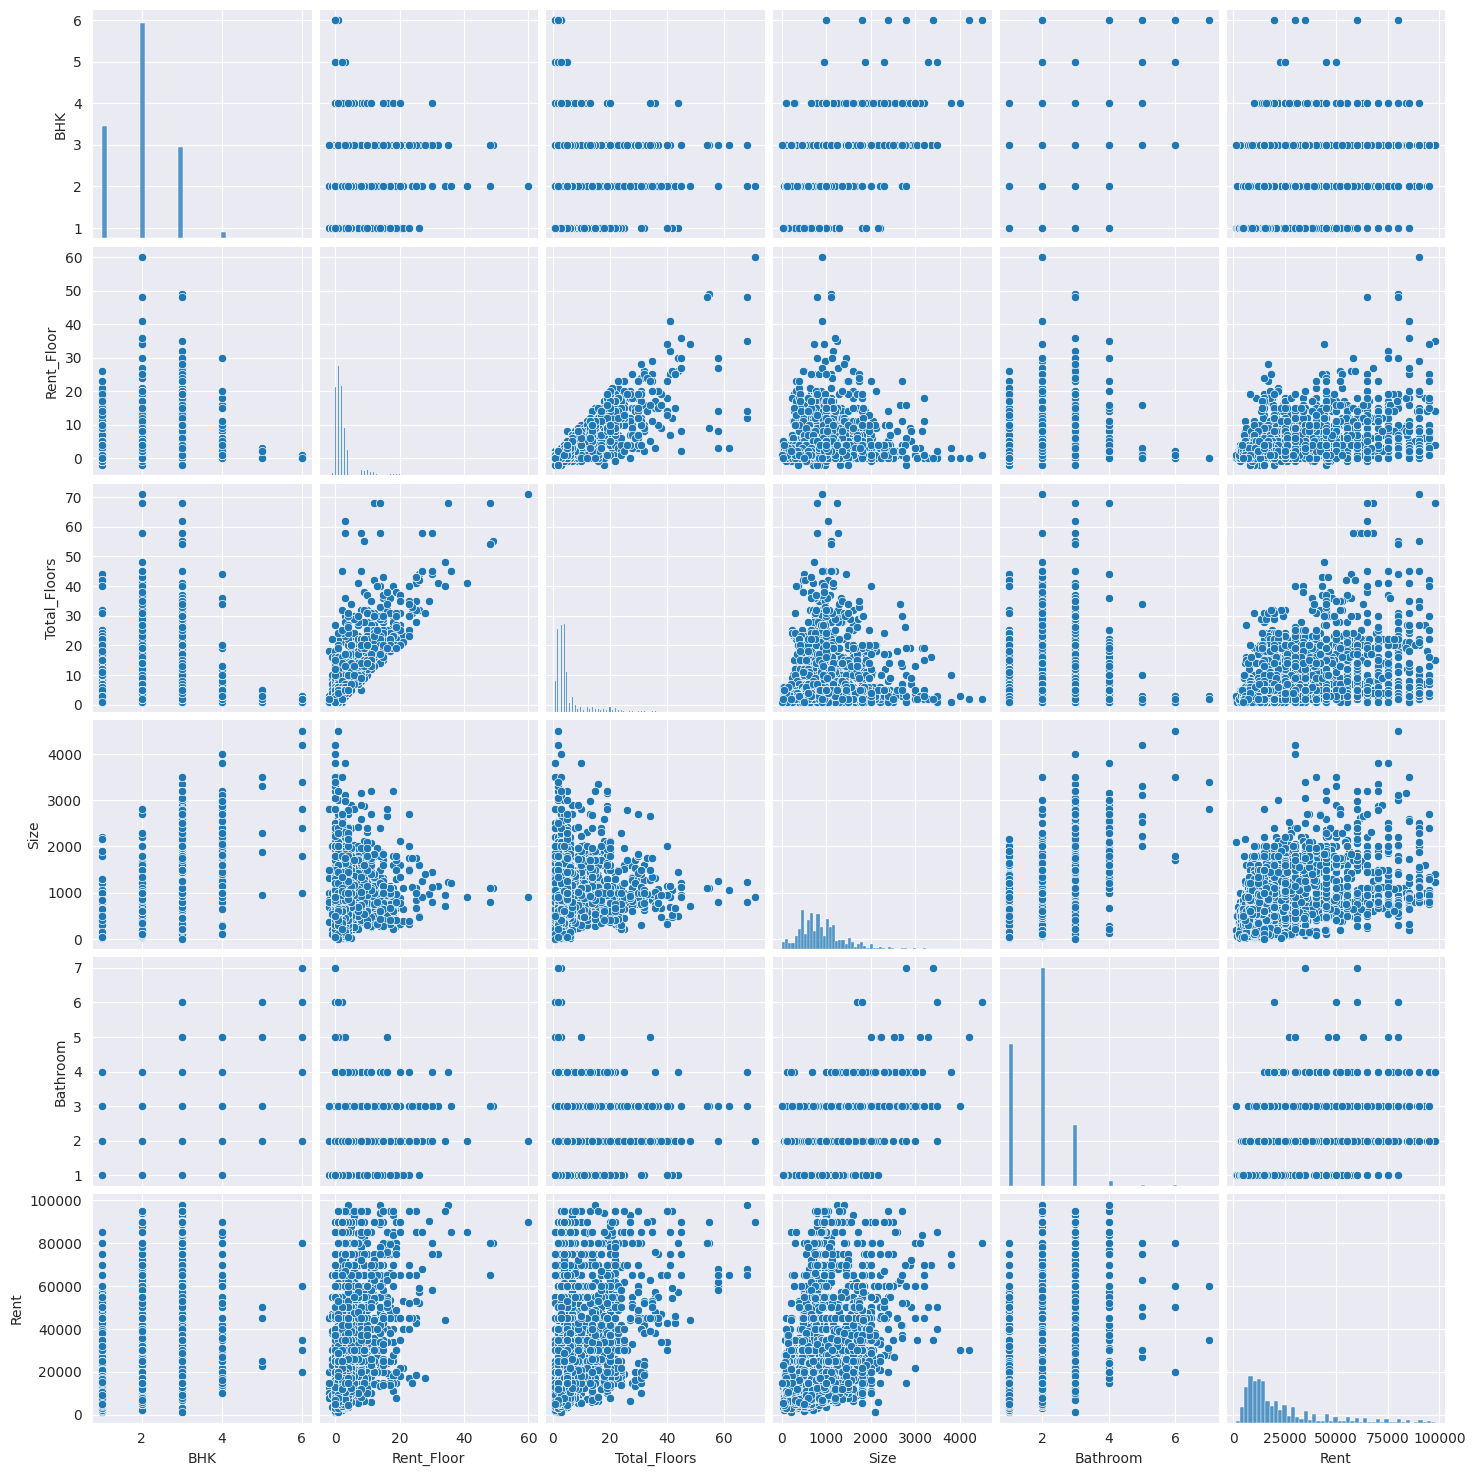

In [34]:
sns.pairplot(df)

# Conclusion
* After analysis, the repost has been written on README.md file in the current "EDA" folder